In [46]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

In [47]:
# Load the data
df = pd.read_csv('Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [48]:
# Initial Exploration
print(df.head())
print()
print(df.info())
print()
print(df.describe())


   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

In [49]:
# Check for missing values
print(df.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


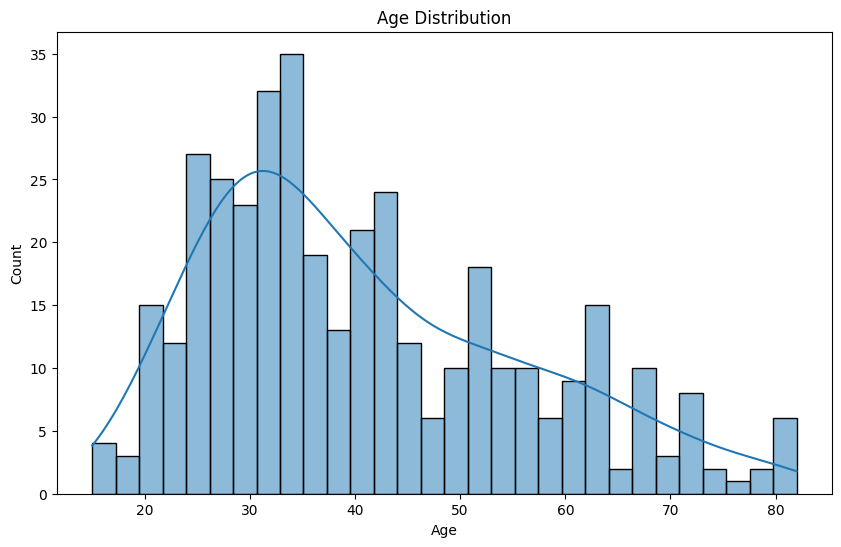

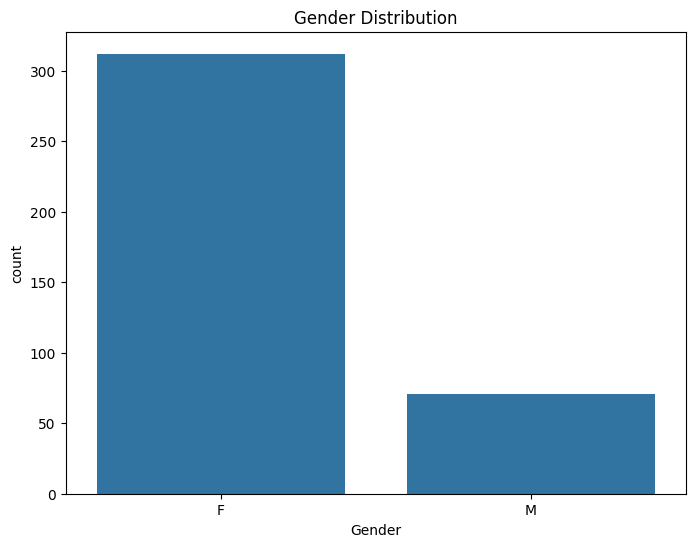

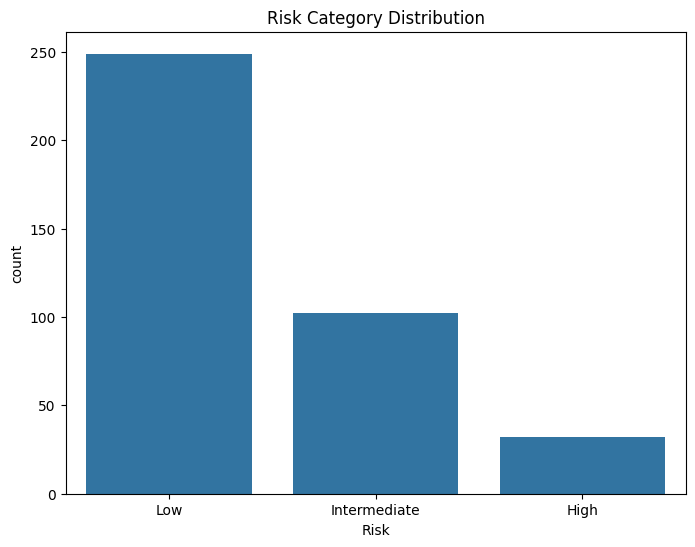

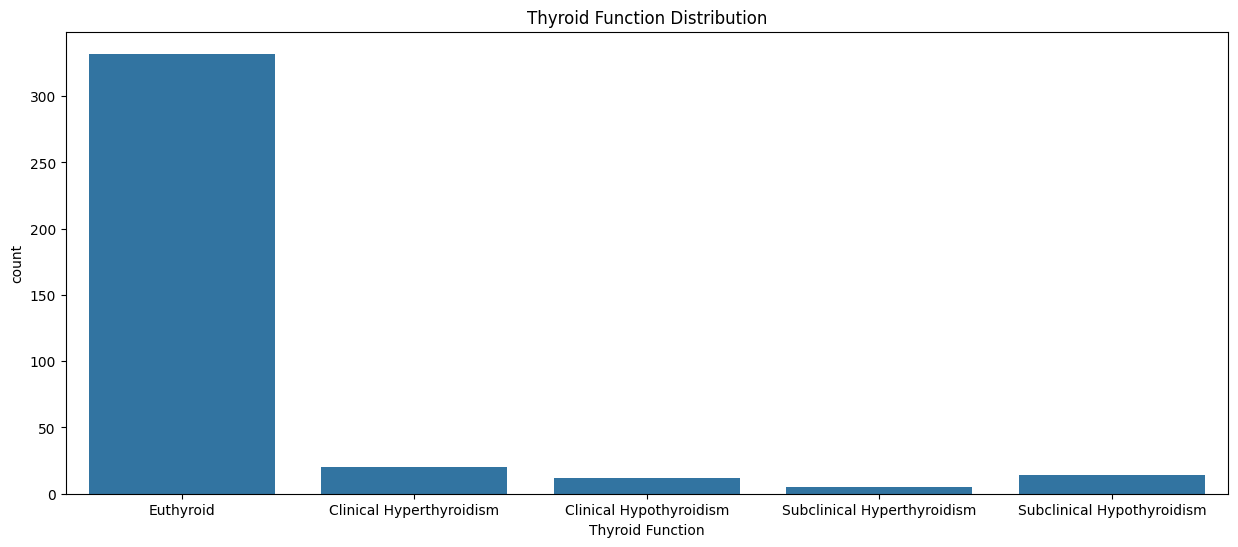

In [50]:
# Data visualization (EDA)
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 2. Gender count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# 3. Distribution of Risk categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk', data=df)
plt.title('Risk Category Distribution')
plt.show()

# 4. Thyroid Function distribution
plt.figure(figsize=(15, 6))
sns.countplot(x='Thyroid Function', data=df)
plt.title('Thyroid Function Distribution')
plt.show()

In [51]:
# Print unique values for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")


Unique values in column 'Gender':
['F' 'M']


Unique values in column 'Smoking':
['No' 'Yes']


Unique values in column 'Hx Smoking':
['No' 'Yes']


Unique values in column 'Hx Radiothreapy':
['No' 'Yes']


Unique values in column 'Thyroid Function':
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']


Unique values in column 'Physical Examination':
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']


Unique values in column 'Adenopathy':
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']


Unique values in column 'Pathology':
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']


Unique values in column 'Focality':
['Uni-Focal' 'Multi-Focal']


Unique values in column 'Risk':
['Low' 'Intermediate' 'High']


Unique values in column 'T':
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']


Unique values in column 'N':
['N0' 'N1b' 'N1a']


Unique val

In [52]:
# Convert categorical columns to numerical using manual mapping
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['Hx Smoking'] = df['Hx Smoking'].map({'Yes': 1, 'No': 0})
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].map({'Yes': 1, 'No': 0})

# Mapping values for 'Thyroid Function'
df['Thyroid Function'] = df['Thyroid Function'].map({
    'Euthyroid': 1, 
    'Clinical Hyperthyroidism': 2, 
    'Clinical Hypothyroidism': 3, 
    'Subclinical Hyperthyroidism': 4, 
    'Subclinical Hypothyroidism': 5
})

# Mapping values for 'Physical Examination'
df['Physical Examination'] = df['Physical Examination'].map({
    'Single nodular goiter-left': 1, 
    'Multinodular goiter': 2, 
    'Single nodular goiter-right': 3, 
    'Normal': 4, 
    'Diffuse goiter': 5
})

# Mapping values for 'Adenopathy'
df['Adenopathy'] = df['Adenopathy'].map({
    'No': 0, 
    'Right': 1, 
    'Extensive': 2, 
    'Left': 3, 
    'Bilateral': 4, 
    'Posterior': 5
})

# Mapping values for 'Pathology'
df['Pathology'] = df['Pathology'].map({
    'Micropapillary': 1, 
    'Papillary': 2, 
    'Follicular': 3, 
    'Hurthel cell': 4
})

# Mapping values for 'Focality'
df['Focality'] = df['Focality'].map({'Uni-Focal': 1, 'Multi-Focal': 2})

# Mapping values for 'Risk'
df['Risk'] = df['Risk'].map({'Low': 1, 'Intermediate': 2, 'High': 3})

# Mapping values for 'T'
df['T'] = df['T'].map({
    'T1a': 1, 'T1b': 2, 'T2': 3, 
    'T3a': 4, 'T3b': 5, 'T4a': 6, 'T4b': 7
})

# Mapping values for 'N'
df['N'] = df['N'].map({'N0': 0, 'N1a': 1, 'N1b': 2})

# Mapping values for 'M'
df['M'] = df['M'].map({'M0': 0, 'M1': 1})

# Mapping values for 'Stage'
df['Stage'] = df['Stage'].map({
    'I': 1, 'II': 2, 'III': 3, 
    'IVA': 4, 'IVB': 5
})

# Mapping values for 'Response'
df['Response'] = df['Response'].map({
    'Indeterminate': 1, 
    'Excellent': 2, 
    'Structural Incomplete': 3, 
    'Biochemical Incomplete': 4
})

# Mapping values for 'Recurred'
df['Recurred'] = df['Recurred'].map({'Yes': 1, 'No': 0})

# Verifying the mappings
print(df.head())

   Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 1   
1   34       0        0           1                0                 1   
2   30       0        0           0                0                 1   
3   62       0        0           0                0                 1   
4   62       0        0           0                0                 1   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     1           0          1         1     1  1  0  0   
1                     2           0          1         1     1  1  0  0   
2                     3           0          1         1     1  1  0  0   
3                     3           0          1         1     1  1  0  0   
4                     2           0          1         2     1  1  0  0   

   Stage  Response  Recurred  
0      1         1         0  
1      1         2         0  
2      1   

In [53]:
# Data Preprocessing
# Handle class imbalance
%pip install imblearn
from imblearn.over_sampling import SMOTE

# Assuming 'Recurred' is the target variable
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Feature Selection (Select top 10 features)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_res, y_res)

# Get the selected feature indices and their corresponding column names
selected_columns = X.columns[selector.get_support(indices=True)]

# Print the selected column names
print("Selected Features:")
print(selected_columns)

# Create a new dataframe with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_columns)

# Print the selected dataframe
print("DataFrame with selected features:")
print(X_selected_df.head())

Selected Features:
Index(['Age', 'Smoking', 'Physical Examination', 'Adenopathy', 'Focality',
       'Risk', 'T', 'N', 'Stage', 'Response'],
      dtype='object')
DataFrame with selected features:
   Age  Smoking  Physical Examination  Adenopathy  Focality  Risk  T  N  \
0   27        0                     1           0         1     1  1  0   
1   34        0                     2           0         1     1  1  0   
2   30        0                     3           0         1     1  1  0   
3   62        0                     3           0         1     1  1  0   
4   62        0                     2           0         2     1  1  0   

   Stage  Response  
0      1         1  
1      1         2  
2      1         2  
3      1         2  
4      1         2  


In [55]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.3, random_state=42)

In [56]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Logistic Regression Results:
Accuracy: 0.90, Recall: 0.92, F1 Score: 0.91, Precision: 0.90
Confusion Matrix:
[[71  9]
 [ 7 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        80
           1       0.90      0.92      0.91        85

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165

Decision Tree Results:
Accuracy: 0.92, Recall: 0.96, F1 Score: 0.92, Precision: 0.88
Confusion Matrix:
[[69 11]
 [ 3 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        80
           1       0.88      0.96      0.92        85

    accuracy                           0.92       165
   macro avg       0.92      0.91      0.91       165
weighted avg       0.92      0.92      0.91       165

Random Forest Results:
Accuracy: 0.96, Recall: 0.9

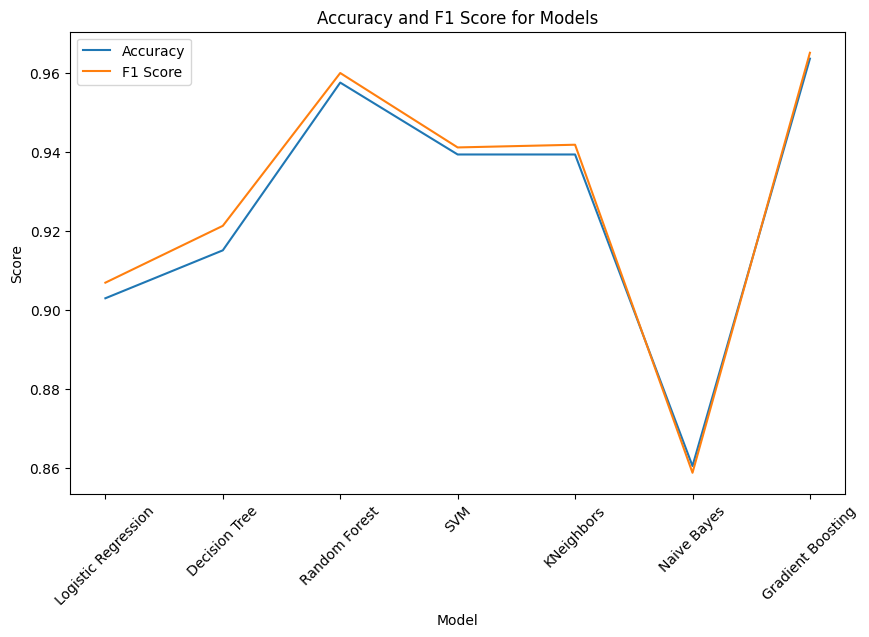

In [57]:
# Model Training (using 6 models)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    results[model_name] = {'accuracy': acc, 'recall': recall, 'f1': f1, 'precision': precision}
    
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plot Accuracy and F1 Score for each model
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), [results[model]['accuracy'] for model in results], label='Accuracy')
plt.plot(list(results.keys()), [results[model]['f1'] for model in results], label='F1 Score')
plt.title('Accuracy and F1 Score for Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [58]:
# Ensemble Model (combine top 3 classifiers)
top_3_classifiers = [
    ('Random Forest', models['Random Forest']),
    ('Gradient Boosting', models['Gradient Boosting']),
    ('Logistic Regression', models['Logistic Regression'])
]

ensemble_model = VotingClassifier(estimators=top_3_classifiers, voting='hard')
ensemble_model.fit(X_train, y_train)
y_ensemble_pred = ensemble_model.predict(X_test)

In [59]:
# Final Ensemble Model Evaluation
ensemble_acc = accuracy_score(y_test, y_ensemble_pred)
ensemble_recall = recall_score(y_test, y_ensemble_pred)
ensemble_f1 = f1_score(y_test, y_ensemble_pred)
ensemble_precision = precision_score(y_test, y_ensemble_pred)

print(f"Ensemble Model Results: Accuracy: {ensemble_acc:.2f}, Recall: {ensemble_recall:.2f}, F1 Score: {ensemble_f1:.2f}, Precision: {ensemble_precision:.2f}")

Ensemble Model Results: Accuracy: 0.98, Recall: 0.99, F1 Score: 0.98, Precision: 0.97


In [60]:
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(ensemble_model, f)